# ANÁLISIS DE SENTIMIENTOS

IMPORTAR BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import math
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to C:\Users\usuario
[nltk_data]     1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


IMPORTAR EL DATASET

In [2]:
df = pd.read_csv('amazon_alexa.tsv', delimiter = '\t')
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [3]:
df.shape


(3150, 5)

LIMPIEZA DE TEXTO

In [4]:
import math
import numpy as np

ps = PorterStemmer()
stop = stopwords.words('english')
stop.remove('didn')
stop.remove('not')
stop.remove('don')
stop.remove('wasn')

corpus = []

for i in range(0, 3150):
    review = df['verified_reviews'][i]
    if isinstance(review, str) and review.strip():
        res = re.sub('[^a-z]', ' ', review)
        res = res.lower()
        res = res.split()
        res = [ps.stem(pal) for pal in res if not pal in set(stop)]
        res = ' '.join(res)
        corpus.append(res)

print(corpus)


['ove cho', 'ove', 'ometim play game answer question correctli lexa say got wrong answer like abl turn light away home', 'lot fun thing yr old learn dinosaur control light play game like categori nice sound play music well', 'usic', 'receiv echo gift need anoth luetooth someth play music easili access found smart speaker wait see els', 'ithout cellphon cannot use mani featur ad not see use great alarm f u r almost deaf hear alarm bedroom live room reason enough keep fun ask random question hear respons not seem smartbon polit yet', 'think th one purchas work get one everi room hous realli like featur offer specifili play music cho control light throughout hous', 'look great', 'ove listen song heard sinc childhood get news weather inform great', 'sent year old ad talk constantli', 'love earn knew thing eveyday till figur everyth work far easi use understand make laugh time', 'purchas mother knee problem give someth tri come not get around fast like enjoy littl big thing lexa play song h

In [13]:
df.sample 

<bound method NDFrame.sample of       rating       date         variation   
0          5  31-Jul-18  Charcoal Fabric   \
1          5  31-Jul-18  Charcoal Fabric    
2          4  31-Jul-18    Walnut Finish    
3          5  31-Jul-18  Charcoal Fabric    
4          5  31-Jul-18  Charcoal Fabric    
...      ...        ...               ...   
3145       5  30-Jul-18        Black  Dot   
3146       5  30-Jul-18        Black  Dot   
3147       5  30-Jul-18        Black  Dot   
3148       5  30-Jul-18        White  Dot   
3149       4  29-Jul-18        Black  Dot   

                                       verified_reviews  feedback  
0                                         Love my Echo!         1  
1                                             Loved it!         1  
2     Sometimes while playing a game, you can answer...         1  
3     I have had a lot of fun with this thing. My 4 ...         1  
4                                                 Music         1  
...                

MODELO DE BAG OF WORDS

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

MATRIZ DE ATRIBUTOS X , VECTOR DE SALIDA y

In [6]:
X = X.toarray()
y = df.iloc[:,-1].values

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

# Asegurar que X e y tengan la misma longitud
min_length = min(len(X), len(y))
X = X[:min_length]
y = y[:min_length]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



UTILIZAR ALGÚN ALGORITMO DE APRENDIZAJE SUPERVISADO

DIVISIÓN DE LOS DATOS EN ENTRENAMIENTO Y PRUEBA

APLICACIÓN DEL MODELO DE NAIVE BAYES

In [26]:
from sklearn.naive_bayes import MultinomialNB
clasificador = MultinomialNB(alpha = 0.1)
clasificador.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

CÁLCULO DE ACCURACY

In [27]:
y_pred = clasificador.predict(X_test)
from sklearn.metrics import accuracy_score
ACC = accuracy_score(y_test,y_pred)
print(ACC)

0.8680781758957655


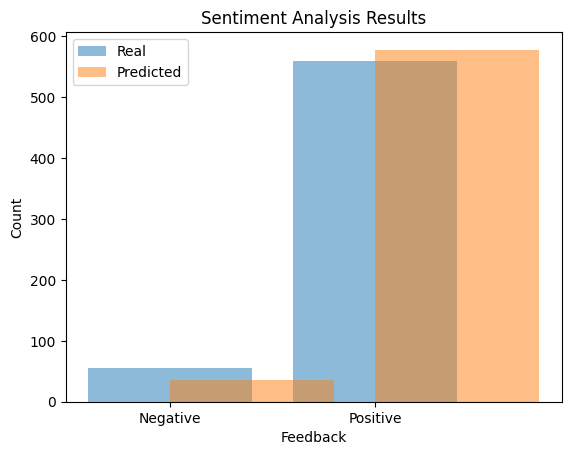

In [30]:
import matplotlib.pyplot as plt

# Obtener las etiquetas únicas
labels = np.unique(np.concatenate((y_test, y_pred)))

# Contar las ocurrencias de las etiquetas reales
true_counts = np.bincount(y_test)

# Contar las ocurrencias de las etiquetas predichas
predicted_counts = np.bincount(y_pred)

# Asegurar que las dos listas tengan la misma longitud
if len(true_counts) < len(labels):
    true_counts = np.concatenate((true_counts, np.zeros(len(labels) - len(true_counts))))

if len(predicted_counts) < len(labels):
    predicted_counts = np.concatenate((predicted_counts, np.zeros(len(labels) - len(predicted_counts))))

# Crear una lista de etiquetas legibles para el gráfico
label_names = ['Negative', 'Positive']

# Crear el gráfico de barras
plt.bar(labels, true_counts, align='center', alpha=0.5, label='Real')
plt.bar(labels, predicted_counts, align='edge', alpha=0.5, label='Predicted')
plt.xticks(labels, label_names)
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')
plt.legend()
plt.show()
